<a href="https://colab.research.google.com/github/ZainUzama/Adult-Census-income-prediction/blob/main/ML_cw_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Data set and Necessary Libraries**

In [322]:
pip install ucimlrepo

In [363]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [324]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

**Descriptive Analysis**

In [325]:
X['income'] = y
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [326]:
X.shape

(48842, 15)

In [327]:
# Statistical summary
X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [328]:
# Check for null values
X.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [329]:
# cheking missing values and drop those values
for i,j in zip(X.columns,(X.values.astype(str) == '?').sum(axis = 0)):
    if j > 0:
        print(str(i) + ': ' + str(j) + ' records')

workclass: 1836 records
occupation: 1843 records
native-country: 583 records


In [330]:
X.nunique()

age                  74
workclass             9
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       42
income                4
dtype: int64

In [331]:
workclass_counts = X['workclass'].value_counts()
print(workclass_counts)

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


In [332]:
occupation_counts = X['occupation'].value_counts()
print(workclass_counts)

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


In [333]:
nativeCountry_counts = X['native-country'].value_counts()
print(nativeCountry_counts)

United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [334]:
X['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [335]:
print("Workclass: "+ str((X['workclass'] == '?').sum())+ " records")
print("Occupation: "+ str((X['occupation'] == '?').sum())+ " records")
print("Native-Country: "+ str((X['native-country'] == '?').sum())+ " records")

Workclass: 1836 records
Occupation: 1843 records
Native-Country: 583 records


In [336]:
# check duplicate rows and and drop those values
duplicateRows = X[X.duplicated()]
duplicateRows.shape

(29, 15)

**Data Preprocessing**

In [337]:
#Dropping duplicate rows
X= X.drop_duplicates()

In [338]:
X.shape

(48813, 15)

In [339]:
X['income'] = X['income'].replace(['<=50K.', '>50K.'], ['<=50K', '>50K'])

<ipython-input-339-8481a7216975>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['income'] = X['income'].replace(['<=50K.', '>50K.'], ['<=50K', '>50K'])


In [340]:
X = X.drop(X[X['workclass'] == '?'].index)
X = X.drop(X[X['occupation'] == '?'].index)
X = X.drop(X[X['native-country'] == '?'].index)

In [341]:
workclass_counts = X['workclass'].value_counts()
print(workclass_counts)

Private             33470
Self-emp-not-inc     3819
Local-gov            3110
State-gov            1962
Self-emp-inc         1652
Federal-gov          1415
Without-pay            21
Never-worked            3
Name: workclass, dtype: int64


In [342]:
occupation_counts = X['occupation'].value_counts()
print(occupation_counts)

Prof-specialty       6065
Craft-repair         6038
Exec-managerial      6010
Adm-clerical         5559
Sales                5438
Other-service        4837
Machine-op-inspct    2983
Transport-moving     2330
Handlers-cleaners    2051
Farming-fishing      1482
Tech-support         1429
Protective-serv       978
Priv-house-serv       234
Armed-Forces           15
Name: occupation, dtype: int64


In [343]:
nativeCountry_counts = X['native-country'].value_counts()
print(nativeCountry_counts)

United-States                 42144
Mexico                          914
Philippines                     285
Germany                         197
Puerto-Rico                     179
Canada                          168
India                           151
El-Salvador                     149
Cuba                            135
England                         123
China                           115
South                           106
Jamaica                         105
Dominican-Republic              100
Italy                           100
Japan                            89
Guatemala                        85
Vietnam                          83
Poland                           83
Columbia                         82
Haiti                            73
Portugal                         64
Iran                             58
Taiwan                           56
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                     

In [344]:
#Grouping work class
X['workclass'] = X['workclass'].replace(['Federal-gov', 'Local-gov', 'State-gov'], 'Government')
X['workclass'] = X['workclass'].replace(['Self-emp-inc', 'Self-emp-not-inc'], 'Self-Employed')
X['workclass'] = X['workclass'].replace(['Without-pay', 'Never-worked'], 'Unemployed')

#Grouping martial status
X['marital-status'] = X['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse', 'Separated', 'Married-spouse-absent'], 'Married')
X['marital-status'] = X['marital-status'].replace(['Never-married', 'Divorced', 'Widowed'], 'Not Married')

#Grouping occupation
X['occupation'] = X['occupation'].replace(['Prof-specialty', 'Exec-managerial'], 'Professional')
X['occupation'] = X['occupation'].replace(['Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing', 'Transport-moving', 'Protective-serv', 'Tech-support'], 'Service')
X['occupation'] = X['occupation'].replace(['Sales', 'Craft-repair'], 'Sales')
X['occupation'] = X['occupation'].replace(['Other-service', 'Armed-Forces', 'Priv-house-serv'], 'Others')

In [345]:
X['workclass'].value_counts()

Private          33470
Government        6487
Self-Employed     5471
Unemployed          24
Name: workclass, dtype: int64

In [346]:
X['marital-status'].value_counts()

Married        23520
Not Married    22895
Name: marital-status, dtype: int64

In [347]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,Government,77516,Bachelors,13,Not Married,Service,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-Employed,83311,Bachelors,13,Married,Professional,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Not Married,Service,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married,Service,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married,Professional,Wife,Black,Female,0,0,40,Cuba,<=50K


In [348]:
X = X.drop('education', axis = 1)

In [349]:
X.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,Government,77516,13,Not Married,Service,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-Employed,83311,13,Married,Professional,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Not Married,Service,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married,Service,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married,Professional,Wife,Black,Female,0,0,40,Cuba,<=50K


In [350]:
lbl_encode = LabelEncoder()

In [351]:
categ = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']

# Encode Categorical Columns
le = LabelEncoder()
X[categ] = X[categ].apply(le.fit_transform)

In [352]:
X.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,0,77516,13,1,3,1,4,1,2174,0,40,38,0
1,50,2,83311,13,0,1,0,4,1,0,0,13,38,0
2,38,1,215646,9,1,3,1,4,1,0,0,40,38,0
3,53,1,234721,7,0,3,0,2,1,0,0,40,38,0
4,28,1,338409,13,0,1,5,2,0,0,0,40,4,0


In [353]:
income_counts = X['income'].value_counts()
print(income_counts)

0    35063
1    11352
Name: income, dtype: int64


In [354]:
print(X['fnlwgt'].corr(X['income']))

-0.005891735299167279


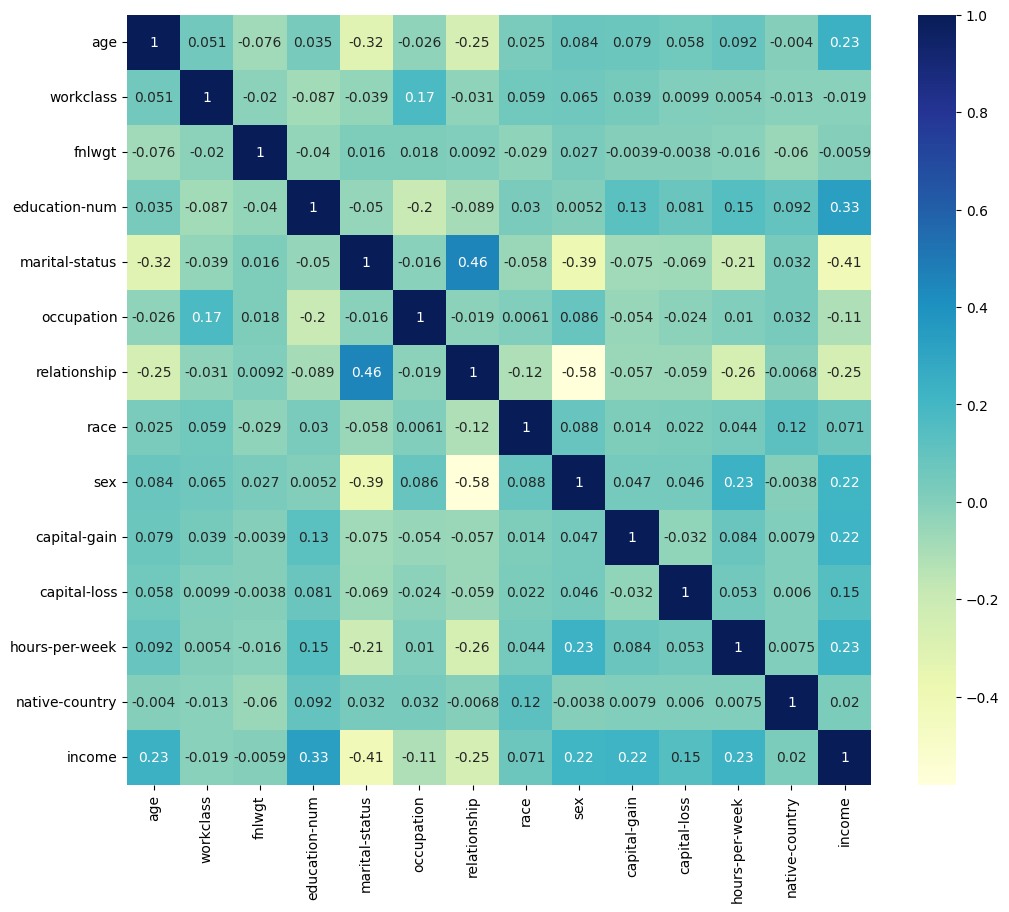

In [356]:
# corelation between attributes
plt.figure(figsize=(12, 10))
dataplot = sns.heatmap(X.corr(), cmap="YlGnBu", annot=True)

In [357]:
X = X.drop('fnlwgt', axis = 1)

In [358]:
X.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,0,13,1,3,1,4,1,2174,0,40,38,0
1,50,2,13,0,1,0,4,1,0,0,13,38,0
2,38,1,9,1,3,1,4,1,0,0,40,38,0
3,53,1,7,0,3,0,2,1,0,0,40,38,0
4,28,1,13,0,1,5,2,0,0,0,40,4,0


**Splitting data in to Training and Testing**

In [360]:
x= X.drop((['income']), axis=1)
y=X['income']

In [361]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [362]:
y_train.value_counts()

0    24501
1     7989
Name: income, dtype: int64

In [364]:
#handling the data imbalance in target column
smote = SMOTE()
x_tarin_smote, y_train_smote = smote.fit_resample(x_train, y_train)
print(x_tarin_smote.shape, y_train_smote.shape)

(49002, 12) (49002,)


In [365]:
y_train_smote.value_counts()

0    24501
1    24501
Name: income, dtype: int64